In [25]:
#导入必须的库
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
plt.style.use('fivethirtyeight')#画图风格
np.random.seed(100)
window=12#时间窗
label_dim=8#标签纬度
scale=100#归一化参数
amount_of_features=1#特征数量
d=0.05#dropout系数
batch_size=12#批训练数量
epoch=200#总迭代次数
train_file='international-airline-passengers.csv'#读取训练集地址
test_file='example.csv'#读取训练集地址
save_file='predict_result_lstm.csv'#储存预测值地址

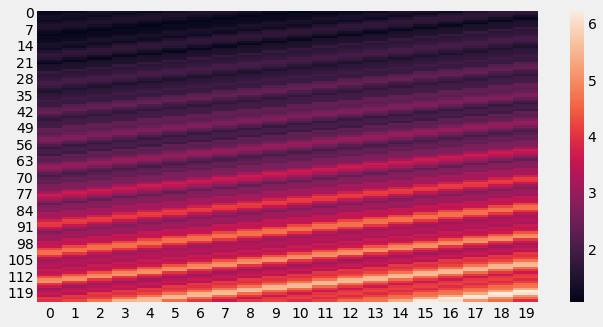

In [26]:
data=pd.read_csv(train_file,header=0) 
data=data['passengers']#选数据集的哪一列
#构造针对机器学习模型的数据集
data=data.values 
dataset=data
for i in range(window+label_dim-1):
    zero=np.zeros(i+1)
    temp=np.append(data[i+1:],zero)
    dataset=np.row_stack((dataset,temp))
dataset=pd.DataFrame(dataset).T
dataset=dataset.iloc[:-(window+label_dim)]
dataset=dataset/scale#进行伪归一化
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(dataset,annot=False)
plt.show()#展示下原始数据集

In [27]:
#划分特征与标签
X=dataset.iloc[:,:window]
y=dataset.iloc[:,-label_dim:]

In [28]:
#构造训练集测试集
X,y=X.values,y.values
print(X.shape)#通过输出训练集测试集的大小来判断数据格式正确。
print(y.shape)

(124, 12)
(124, 8)


In [29]:
#LSTM神经网络的数据集要稍微做一些修改
X= np.reshape(X, (X.shape[0],X.shape[1], amount_of_features))
print(X.shape)
print(y.shape)

(124, 12, 1)
(124, 8)


In [30]:
#建立LSTM模型 训练
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Dropout
from keras.layers.recurrent import LSTM
#建立训练模型过程
model = Sequential()#建立层次模型
model.add(LSTM(32, input_shape=(window, amount_of_features), return_sequences=False))#建立LSTM层
#model.add(Dropout(d))
model.add(Dense(label_dim*2,activation='relu'))   #建立全连接层  
#model.add(Dropout(d))
model.add(Dense(label_dim))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
Total params: 5,016
Trainable params: 5,016
Non-trainable params: 0
_________________________________________________________________


In [31]:
#神经网络训练及结果
history = model.fit(X, y, epochs =epoch, batch_size = batch_size,verbose=1,validation_split=0.1) #训练模型nb_epoch次

Train on 111 samples, validate on 13 samples
Epoch 1/200
111/111 [==============================] - 1s 7ms/step - loss: 7.9568 - acc: 0.0901 - val_loss: 19.7063 - val_acc: 0.1538
Epoch 2/200
111/111 [==============================] - 0s 812us/step - loss: 7.1506 - acc: 0.0901 - val_loss: 18.1487 - val_acc: 0.1538
Epoch 3/200
111/111 [==============================] - 0s 871us/step - loss: 6.2971 - acc: 0.0901 - val_loss: 16.2256 - val_acc: 0.1538
Epoch 4/200
111/111 [==============================] - 0s 883us/step - loss: 5.2531 - acc: 0.0901 - val_loss: 13.7906 - val_acc: 0.1538
Epoch 5/200
111/111 [==============================] - 0s 870us/step - loss: 4.0172 - acc: 0.0901 - val_loss: 10.9641 - val_acc: 0.1538
Epoch 6/200
111/111 [==============================] - 0s 880us/step - loss: 2.8970 - acc: 0.0901 - val_loss: 8.1816 - val_acc: 0.1538
Epoch 7/200
111/111 [==============================] - 0s 821us/step - loss: 2.0284 - acc: 0.0901 - val_loss: 6.2961 - val_acc: 0.1538
Epoch 8

Epoch 61/200
111/111 [==============================] - 0s 737us/step - loss: 0.1366 - acc: 0.2252 - val_loss: 0.6618 - val_acc: 0.3846
Epoch 62/200
111/111 [==============================] - 0s 839us/step - loss: 0.1403 - acc: 0.2883 - val_loss: 0.6716 - val_acc: 0.3846
Epoch 63/200
111/111 [==============================] - 0s 803us/step - loss: 0.1309 - acc: 0.2703 - val_loss: 0.7254 - val_acc: 0.2308
Epoch 64/200
111/111 [==============================] - 0s 868us/step - loss: 0.1292 - acc: 0.2883 - val_loss: 0.6759 - val_acc: 0.3077
Epoch 65/200
111/111 [==============================] - 0s 928us/step - loss: 0.1309 - acc: 0.2523 - val_loss: 0.6707 - val_acc: 0.3077
Epoch 66/200
111/111 [==============================] - 0s 915us/step - loss: 0.1295 - acc: 0.2432 - val_loss: 0.7325 - val_acc: 0.2308
Epoch 67/200
111/111 [==============================] - 0s 917us/step - loss: 0.1308 - acc: 0.2523 - val_loss: 0.6362 - val_acc: 0.3077
Epoch 68/200
111/111 [==========================

111/111 [==============================] - 0s 874us/step - loss: 0.0734 - acc: 0.3784 - val_loss: 0.3602 - val_acc: 0.6154
Epoch 122/200
111/111 [==============================] - 0s 834us/step - loss: 0.0748 - acc: 0.3964 - val_loss: 0.3918 - val_acc: 0.3846
Epoch 123/200
111/111 [==============================] - 0s 821us/step - loss: 0.0725 - acc: 0.3874 - val_loss: 0.3860 - val_acc: 0.5385
Epoch 124/200
111/111 [==============================] - 0s 834us/step - loss: 0.0720 - acc: 0.3694 - val_loss: 0.3636 - val_acc: 0.5385
Epoch 125/200
111/111 [==============================] - 0s 833us/step - loss: 0.0692 - acc: 0.4144 - val_loss: 0.4061 - val_acc: 0.5385
Epoch 126/200
111/111 [==============================] - 0s 819us/step - loss: 0.0686 - acc: 0.3964 - val_loss: 0.3578 - val_acc: 0.4615
Epoch 127/200
111/111 [==============================] - 0s 804us/step - loss: 0.0687 - acc: 0.4234 - val_loss: 0.3722 - val_acc: 0.4615
Epoch 128/200
111/111 [==============================] 

Epoch 181/200
111/111 [==============================] - 0s 764us/step - loss: 0.0443 - acc: 0.5225 - val_loss: 0.3033 - val_acc: 0.4615
Epoch 182/200
111/111 [==============================] - 0s 784us/step - loss: 0.0431 - acc: 0.4865 - val_loss: 0.3183 - val_acc: 0.5385
Epoch 183/200
111/111 [==============================] - 0s 786us/step - loss: 0.0446 - acc: 0.5405 - val_loss: 0.2966 - val_acc: 0.5385
Epoch 184/200
111/111 [==============================] - 0s 769us/step - loss: 0.0452 - acc: 0.5315 - val_loss: 0.2879 - val_acc: 0.6154
Epoch 185/200
111/111 [==============================] - 0s 771us/step - loss: 0.0446 - acc: 0.5495 - val_loss: 0.2980 - val_acc: 0.6154
Epoch 186/200
111/111 [==============================] - 0s 764us/step - loss: 0.0450 - acc: 0.4775 - val_loss: 0.3224 - val_acc: 0.5385
Epoch 187/200
111/111 [==============================] - 0s 758us/step - loss: 0.0433 - acc: 0.5045 - val_loss: 0.2804 - val_acc: 0.6154
Epoch 188/200
111/111 [==================

In [36]:
#筛选测试集
test=pd.read_csv(test_file,header=0) 
test=test['passengers']/scale#选数据集的哪一列
test=np.reshape(test.values, (1, window,amount_of_features))
print(test.shape)

(1, 12, 1)


In [37]:
#实际预测
predict=model.predict(test)[0,:]*scale
#储存文件
(pd.DataFrame(predict)).to_csv(save_file)
print(predict)

[380.64984 352.39444 424.23895 395.47702 460.3201  533.6566  535.4953
 525.6112 ]


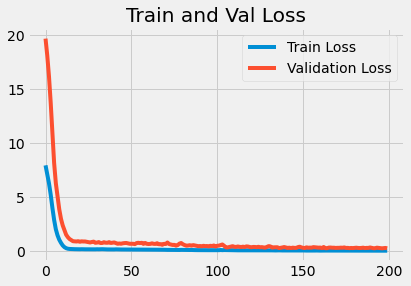

In [38]:
#迭代图像
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epoch)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Train and Val Loss')
plt.show()

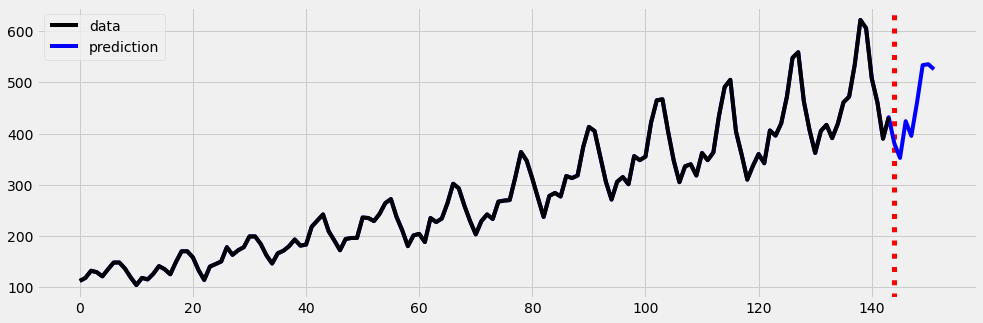

In [39]:

data_times=np.arange(len(data))
all_data=np.hstack((data,predict)) 
predicted_times=np.arange(len(all_data))
plt.figure(figsize=(15, 5))
plt.axvline(len(data), linestyle="dotted", linewidth=5, color='r')
predicted_lines = plt.plot(predicted_times, all_data, label="prediction", color="b")
data_lines = plt.plot(data_times, data, label="data", color="k")
plt.legend(handles=[data_lines[0], predicted_lines[0]],loc="upper left")
#为训练，验证，预测数据分别创建图例
plt.show()